<a href="https://colab.research.google.com/github/marshaadp/DEP-BIN-PROJECT/blob/main/PROJECT_DEP_BIN_MARSHANDA_DP_4ITE1_CORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. CORRELATION**

Tujuan :
1. Mengetahui apakah ada hubungan yang kuat antara nilai akhir (G1, G2, G3) dengan kelompok data variabel independen

2. Mengetahui kelompok data variabel independen mana yang paling besar nilai korelasinya terhadap nilai akhir (G1, G2, G3)

## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error

## **LOAD DATA**

In [ ]:
df = pd.read_csv('mat2.csv')

COLLECTING DATA

In [ ]:
print(df.head())  # show the first few rows of the data

   Unnamed: 0 school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F   18       U     GT3       A     4     4  at_home   
1           1     GP   F   17       U     GT3       T     1     1  at_home   
2           2     GP   F   15       U     LE3       T     1     1  at_home   
3           3     GP   F   15       U     GT3       T     4     2   health   
4           4     GP   F   16       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...      4        3     4     1     1       3        6   5   6   6  
1  ...      5        3     3     1     1       3        4   5   5   6  
2  ...      4        3     2     2     3       3       10   7   8  10  
3  ...      3        2     2     1     1       5        2  15  14  15  
4  ...      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]


Visualizing distribution of data

KELOMPOK DATA KEUANGAN

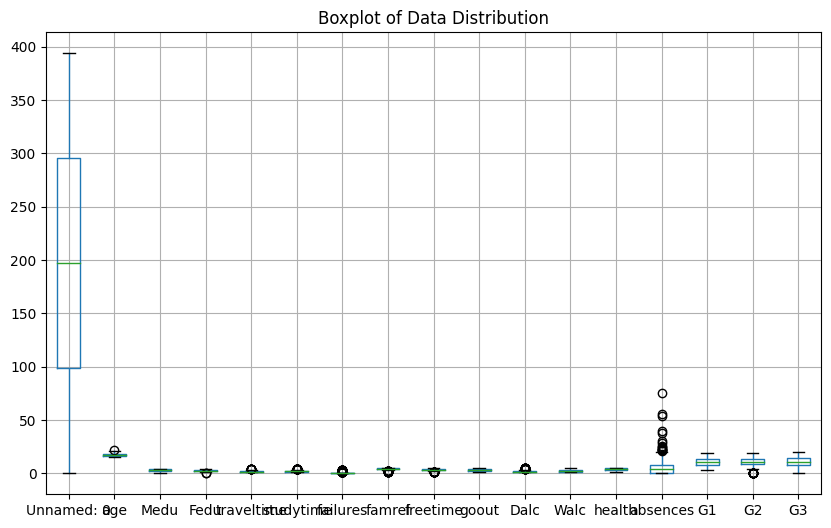

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Data Distribution')
plt.show()

PENGECEKAN DATA KOSONG

In [ ]:
print(df.eq(0).sum())

Unnamed: 0      1
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64


 Reading and checking the structure of the data

In [ ]:
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

 Convert categorical variables to numerical variables

In [ ]:
df['school'] = df['school'].map({'GP': 0, 'MS': 1}).astype(int)
df['sex'] = df['sex'].map({'F': 0, 'M': 1}).astype(int)
df['address'] = df['address'].map({'U': 0, 'R': 1}).astype(int)
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1}).astype(int)
df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}).astype(int)
df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}).astype(int)
df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df['schoolsup'] = df['schoolsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['famsup'] = df['famsup'].map({'no' : 0, 'yes' : 1}).astype(int)
df['paid'] = df['paid'].map({'no' : 0, 'yes' : 1}).astype(int)
df['activities'] = df['activities'].map({'no' : 0, 'yes' : 1}).astype(int)
df['higher'] = df['higher'].map({'no' : 0, 'yes' : 1}).astype(int)
df['internet'] = df['internet'].map({'no' : 0, 'yes' : 1}).astype(int)
df['romantic'] = df['romantic'].map({'no' : 0, 'yes' : 1}).astype(int)

Grouping data into categories

In [ ]:
# Grouping data into categories
categories = {
    'Keluarga': ['famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'guardian', 'famrel', 'famsup'],
    'Keuangan/financial': ['mjob', 'fjob', 'paid', 'schoolsup'],
    'health': ['sex', 'age', 'walc', 'dalc'],
    'social': ['sex', 'reason', 'activities', 'failures', 'romantic', 'internet', 'freetime', 'goout'],
    'waktu': ['address', 'traveltimes', 'studytime', 'activities', 'freetime', 'goout']
}


In [ ]:
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    int64 
 2   sex         395 non-null    int64 
 3   age         395 non-null    int64 
 4   address     395 non-null    int64 
 5   famsize     395 non-null    int64 
 6   Pstatus     395 non-null    int64 
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    int64 
 10  Fjob        395 non-null    int64 
 11  reason      395 non-null    int64 
 12  guardian    395 non-null    int64 
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    int64 
 17  famsup      395 non-null    int64 
 18  paid        395 non-null    int64 
 19  activities  395 non-null    int64 
 20  nursery   

Normalization

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
scaler = MinMaxScaler()
df[['school','sex','age','address','famsize','Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian','traveltime', 'studytime', 'failures', 'schoolsup','famsup', 'paid','activities','higher','internet','romantic','famrel', 'freetime', 'goout','Dalc', 'Walc', 'health', 'absences','G1', 'G2', 'G3']] = scaler.fit_transform(df[['school','sex','age','address','famsize','Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian','traveltime', 'studytime', 'failures', 'schoolsup','famsup','paid','activities','higher','internet','romantic','famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G1', 'G2', 'G3']])
print(df)

     Unnamed: 0  school  sex       age  address  famsize  Pstatus  Medu  Fedu  \
0             0     0.0  0.0  0.428571      0.0      1.0      1.0  1.00  1.00   
1             1     0.0  0.0  0.285714      0.0      1.0      0.0  0.25  0.25   
2             2     0.0  0.0  0.000000      0.0      0.0      0.0  0.25  0.25   
3             3     0.0  0.0  0.000000      0.0      1.0      0.0  1.00  0.50   
4             4     0.0  0.0  0.142857      0.0      1.0      0.0  0.75  0.75   
..          ...     ...  ...       ...      ...      ...      ...   ...   ...   
390         390     1.0  1.0  0.714286      0.0      0.0      1.0  0.50  0.50   
391         391     1.0  1.0  0.285714      0.0      0.0      0.0  0.75  0.25   
392         392     1.0  1.0  0.857143      1.0      1.0      0.0  0.25  0.25   
393         393     1.0  1.0  0.428571      1.0      0.0      0.0  0.75  0.50   
394         394     1.0  1.0  0.571429      0.0      0.0      0.0  0.25  0.25   

     Mjob  ...  famrel  fre

KORELASI

1. Korelasi "Keluarga" dengan label "G1","G2","G3"

In [ ]:
# Select the variables in the 'Keluarga' category
Keluarga = ['famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'famrel', 'famsup']

# Calculate the correlation between the 'Keluarga' variables and G1
Kcorr_matrix_g1 = df[Keluarga + ['G1']].corr()
Kcorr_g1 = Kcorr_matrix_g1['G1']
print(Kcorr_g1)
print("Mean of correlation coefficients with G1: ", np.mean(Kcorr_g1))

# Calculate the correlation between the 'Keluarga' variables and G2
Kcorr_matrix_g2 = df[Keluarga + ['G2']].corr()
Kcorr_g2 = Kcorr_matrix_g2['G2']
print(Kcorr_g2)
print("Mean of correlation coefficients with G2: ", np.mean(Kcorr_g2))

# Calculate the correlation between the 'Keluarga' variables and G3
Kcorr_matrix_g3 = df[Keluarga + ['G3']].corr()
Kcorr_g3 = Kcorr_matrix_g3['G3']
print(Kcorr_g3)
print("Mean of correlation coefficients with G3: ", np.mean(Kcorr_g3))



famsize    -0.071445
Pstatus     0.016868
Mjob       -0.187996
Fjob       -0.152132
guardian   -0.004788
famrel      0.022168
famsup     -0.084569
G1          1.000000
Name: G1, dtype: float64
Mean of correlation coefficients with G1:  0.06726334518336713
famsize    -0.081223
Pstatus     0.041382
Mjob       -0.155340
Fjob       -0.115121
guardian   -0.021254
famrel     -0.018281
famsup     -0.059166
G2          1.000000
Name: G2, dtype: float64
Mean of correlation coefficients with G2:  0.07387473200627376
famsize    -0.081407
Pstatus     0.058009
Mjob       -0.145827
Fjob       -0.091128
guardian   -0.054193
famrel      0.051363
famsup     -0.039157
G3          1.000000
Name: G3, dtype: float64
Mean of correlation coefficients with G3:  0.08720752315524358


In [ ]:
# Calculate the mean of the correlations
Kmean_corr = (np.mean(np.mean(Kcorr_g1)) + (np.mean(Kcorr_g2)) + (np.mean(Kcorr_g3)))

# Display the mean of the correlations
print(Kmean_corr)

0.22834560034488446


2. Korelasi "Finansial" dengan label "G1","G2","G3"

In [ ]:
# Select the variables in the 'Finansial' category
Finansial = ['Mjob', 'Fjob', 'paid', 'schoolsup']

# Calculate the correlation between the 'Keluarga' variables and G1
Fcorr_matrix_g1 = df[Finansial + ['G1']].corr()
Fcorr_g1 = Fcorr_matrix_g1['G1']
print(Fcorr_g1)
print("Mean of correlation coefficients with G1: ", np.mean(Fcorr_g1))

# Calculate the correlation between the 'Keluarga' variables and G2
Fcorr_matrix_g2 = df[Finansial+ ['G2']].corr()
Fcorr_g2 = Fcorr_matrix_g2['G2']
print(Fcorr_g2)
print("Mean of correlation coefficients with G2: ", np.mean(Fcorr_g2))

# Calculate the correlation between the 'Keluarga' variables and G3
Fcorr_matrix_g3 = df[Finansial + ['G3']].corr()
Fcorr_g3 = Fcorr_matrix_g3['G3']
print(Fcorr_g3)
print("Mean of correlation coefficients with G3: ", np.mean(Fcorr_g3))



Mjob        -0.187996
Fjob        -0.152132
paid         0.039079
schoolsup   -0.212607
G1           1.000000
Name: G1, dtype: float64
Mean of correlation coefficients with G1:  0.0972689869895674
Mjob        -0.155340
Fjob        -0.115121
paid         0.105198
schoolsup   -0.117385
G2           1.000000
Name: G2, dtype: float64
Mean of correlation coefficients with G2:  0.14347052724679293
Mjob        -0.145827
Fjob        -0.091128
paid         0.101996
schoolsup   -0.082788
G3           1.000000
Name: G3, dtype: float64
Mean of correlation coefficients with G3:  0.15645059680983708


In [ ]:
# Calculate the mean of the correlations
Fmean_corr = (np.mean(np.mean(Fcorr_g1)) + (np.mean(Fcorr_g2)) + (np.mean(Fcorr_g3)))

# Display the mean of the correlations
print(Fmean_corr)

0.3971901110461974


3. Korelasi "Health" dengan label "G1","G2","G3"

In [ ]:
# Select the variables in the 'Health' category
Health = ['sex', 'age', 'Walc', 'Dalc']

# Calculate the correlation between the 'Health' variables and G1
Hcorr_matrix_g1 = df[Health + ['G1']].corr()
Hcorr_g1 = Hcorr_matrix_g1['G1']
print(Hcorr_g1)
print("Mean of correlation coefficients with G1: ", np.mean(Hcorr_g1))

# Calculate the correlation between the 'Health' variables and G2
Hcorr_matrix_g2 = df[Health+ ['G2']].corr()
Hcorr_g2 = Hcorr_matrix_g2['G2']
print(Hcorr_g2)
print("Mean of correlation coefficients with G2: ", np.mean(Hcorr_g2))

# Calculate the correlation between the 'Health' variables and G3
Hcorr_matrix_g3 = df[Health + ['G3']].corr()
Hcorr_g3 = Hcorr_matrix_g3['G3']
print(Hcorr_g3)
print("Mean of correlation coefficients with G3: ", np.mean(Hcorr_g3))



sex     0.091839
age    -0.064081
Walc   -0.126179
Dalc   -0.094159
G1      1.000000
Name: G1, dtype: float64
Mean of correlation coefficients with G1:  0.16148393238348535
sex     0.091099
age    -0.143474
Walc   -0.084927
Dalc   -0.064120
G2      1.000000
Name: G2, dtype: float64
Mean of correlation coefficients with G2:  0.15971557079235338
sex     0.103456
age    -0.161579
Walc   -0.051939
Dalc   -0.054660
G3      1.000000
Name: G3, dtype: float64
Mean of correlation coefficients with G3:  0.16705536900381412


In [ ]:
# Calculate the mean of the correlations
Hmean_corr = (np.mean(np.mean(Hcorr_g1)) + (np.mean(Hcorr_g2)) + (np.mean(Hcorr_g3)))

# Display the mean of the correlations
print(Hmean_corr)

0.48825487217965285


4. Korelasi "Social" dengan label "G1","G2","G3"

In [ ]:
# Select the variables in the 'Health' category
Social = ['sex', 'reason', 'activities', 'failures', 'romantic', 'internet','freetime','goout','absences']

# Calculate the correlation between the 'Health' variables and G1
Scorr_matrix_g1 = df[Social + ['G1']].corr()
Scorr_g1 = Scorr_matrix_g1['G1']
print(Scorr_g1)
print("Mean of correlation coefficients with G1: ", np.mean(Scorr_g1))

# Calculate the correlation between the 'Health' variables and G2
Scorr_matrix_g2 = df[Social+ ['G2']].corr()
Scorr_g2 = Scorr_matrix_g2['G2']
print(Scorr_g2)
print("Mean of correlation coefficients with G2: ", np.mean(Scorr_g2))

# Calculate the correlation between the 'Health' variables and G3
Scorr_matrix_g3 = df[Social + ['G3']].corr()
Scorr_g3 = Scorr_matrix_g3['G3']
print(Scorr_g3)
print("Mean of correlation coefficients with G3: ", np.mean(Scorr_g3))



sex           0.091839
reason       -0.031753
activities    0.057010
failures     -0.354718
romantic     -0.037188
internet      0.071619
freetime      0.012613
goout        -0.149104
absences     -0.031003
G1            1.000000
Name: G1, dtype: float64
Mean of correlation coefficients with G1:  0.0629315275494237
sex           0.091099
reason       -0.031470
activities    0.050552
failures     -0.355896
romantic     -0.111774
internet      0.119439
freetime     -0.013777
goout        -0.162250
absences     -0.031777
G2            1.000000
Name: G2, dtype: float64
Mean of correlation coefficients with G2:  0.055414577858338324
sex           0.103456
reason       -0.008502
activities    0.016100
failures     -0.360415
romantic     -0.129970
internet      0.098483
freetime      0.011307
goout        -0.132791
absences      0.034247
G3            1.000000
Name: G3, dtype: float64
Mean of correlation coefficients with G3:  0.06319153887006197


In [ ]:
# Calculate the mean of the correlations
Smean_corr = (np.mean(np.mean(Scorr_g1)) + (np.mean(Scorr_g2)) + (np.mean(Scorr_g3)))

# Display the mean of the correlations
print(Smean_corr)

0.18153764427782398


5. Korelasi "Waktu" dengan label "G1","G2","G3"

In [ ]:
# Select the variables in the 'Health' category
Waktu = ['address', 'traveltime', 'studytime', 'activities', 'freetime', 'internet','goout']

# Calculate the correlation between the 'Health' variables and G1
Wcorr_matrix_g1 = df[Waktu + ['G1']].corr()
Wcorr_g1 = Wcorr_matrix_g1['G1']
print(Wcorr_g1)
print("Mean of correlation coefficients with G1: ", np.mean(Wcorr_g1))

# Calculate the correlation between the 'Health' variables and G2
Wcorr_matrix_g2 = df[Waktu+ ['G2']].corr()
Wcorr_g2 = Wcorr_matrix_g2['G2']
print(Wcorr_g2)
print("Mean of correlation coefficients with G2: ", np.mean(Wcorr_g2))

# Calculate the correlation between the 'Health' variables and G3
Wcorr_matrix_g3 = df[Waktu + ['G3']].corr()
Wcorr_g3 = Wcorr_matrix_g3['G3']
print(Wcorr_g3)
print("Mean of correlation coefficients with G3: ", np.mean(Wcorr_g3))



address      -0.069704
traveltime   -0.093040
studytime     0.160612
activities    0.057010
freetime      0.012613
internet      0.071619
goout        -0.149104
G1            1.000000
Name: G1, dtype: float64
Mean of correlation coefficients with G1:  0.12375064654522684
address      -0.126037
traveltime   -0.153198
studytime     0.135880
activities    0.050552
freetime     -0.013777
internet      0.119439
goout        -0.162250
G2            1.000000
Name: G2, dtype: float64
Mean of correlation coefficients with G2:  0.10632599419237374
address      -0.105756
traveltime   -0.117142
studytime     0.097820
activities    0.016100
freetime      0.011307
internet      0.098483
goout        -0.132791
G3            1.000000
Name: G3, dtype: float64
Mean of correlation coefficients with G3:  0.10850255153346675


In [ ]:
# Calculate the mean of the correlations
Wmean_corr = (np.mean(np.mean(Wcorr_g1)) + (np.mean(Wcorr_g2)) + (np.mean(Wcorr_g3)))

# Display the mean of the correlations
print(Wmean_corr)

0.33857919227106736


Membandingkan semua korelasi tiap kelompok

In [ ]:
print(Kmean_corr)
print(Fmean_corr)
print(Hmean_corr)
print(Smean_corr)
print(Wmean_corr)

0.22834560034488446
0.3971901110461974
0.48825487217965285
0.18153764427782398
0.33857919227106736


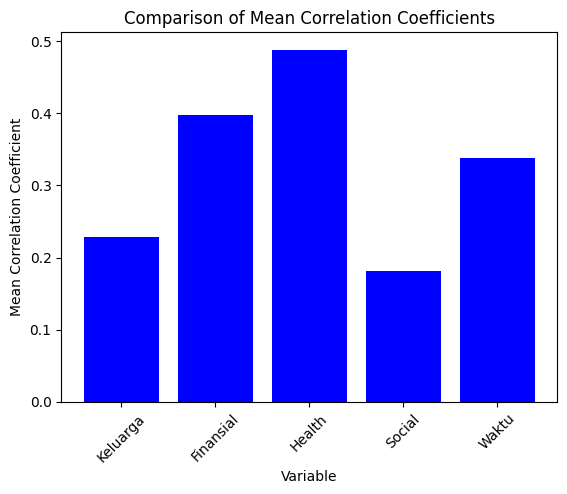

In [ ]:
import matplotlib.pyplot as plt

categories = ['Keluarga', 'Finansial', 'Health', 'Social', 'Waktu']
means = [0.22834560034488446, 0.3971901110461974, 0.48825487217965285, 0.18153764427782398, 0.33857919227106736]

plt.bar(categories, means, color='blue')
plt.xlabel('Variable')
plt.ylabel('Mean Correlation Coefficient')
plt.title('Comparison of Mean Correlation Coefficients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

data = {'Variable': categories, 'Mean Correlation Coefficient': means}
df = pd.DataFrame(data)

df.to_csv('Comparison of Mean Correlation Coefficients.csv', index=False)

KNN

Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

Mengatur data frame

Langkah selanjutnya adalah mendefinisikan fitur (X) dan target (y) dari dataset.

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']
print(df.info())  # show the data types of each column
print(df.describe())  # show summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    float64
 2   sex         395 non-null    float64
 3   age         395 non-null    float64
 4   address     395 non-null    float64
 5   famsize     395 non-null    float64
 6   Pstatus     395 non-null    float64
 7   Medu        395 non-null    float64
 8   Fedu        395 non-null    float64
 9   Mjob        395 non-null    float64
 10  Fjob        395 non-null    float64
 11  reason      395 non-null    float64
 12  guardian    395 non-null    float64
 13  traveltime  395 non-null    float64
 14  studytime   395 non-null    float64
 15  failures    395 non-null    float64
 16  schoolsup   395 non-null    float64
 17  famsup      395 non-null    float64
 18  paid        395 non-null    float64
 19  activities  395 non-null    f

Pembagian data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Skala Fitur: Fitur-fitur dinormalisasi menggunakan StandardScaler untuk menghasilkan distribusi yang memiliki rata-rata 0 dan varians 1.

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-0.18905039 -0.34722813  1.07906606 ... -0.53741034  0.33205033
   0.62616324]
 [-0.07141649 -0.34722813  1.07906606 ... -0.83744862  0.64340909
   0.89283114]
 [-0.26144048 -0.34722813 -0.92672732 ... -0.83744862 -0.91338472
  -0.97384417]
 ...
 [ 0.61628938 -0.34722813 -0.92672732 ...  1.41283849 -0.60202596
  -0.44050837]
 [ 1.32209277 -0.34722813 -0.92672732 ... -0.83744862  0.64340909
   1.15949904]
 [-0.90390255 -0.34722813  1.07906606 ... -0.23737206 -0.2906672
   0.62616324]]
[[-1.12107282 -0.34722813  1.07906606 ... -0.53741034 -0.91338472
  -0.70717627]
 [ 1.53021429  2.87995098  1.07906606 ... -0.3873912   0.95476785
   0.35949533]
 [ 0.41721663 -0.34722813  1.07906606 ...  0.36270451 -2.47017853
  -1.50717997]
 ...
 [-0.79531741 -0.34722813  1.07906606 ...  0.36270451 -0.60202596
  -0.44050837]
 [-1.79972993 -0.34722813 -0.92672732 ... -0.53741034  1.26612661
   0.89283114]
 [-1.66399851 -0.34722813  1.07906606 ...  1.56285764 -1.53610225
  -1.50717997]]


Penentuan Jangkauan K: Kita menentukan jangkauan nilai k yang akan digunakan dalam model KNN.

In [ ]:
k_values = list(range(1, 31))
print(k_values)
# Initialize an empty list to store accuracy scores
scores = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


**Validasi Silang**: Proses cross-validation digunakan untuk mengevaluasi kinerja model KNN dengan berbagai nilai k.

In [ ]:

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    scores.append(score)

Visualisasi Skor: Skor negatif rata-rata kesalahan kuadrat ditampilkan dalam plot untuk setiap nilai k.


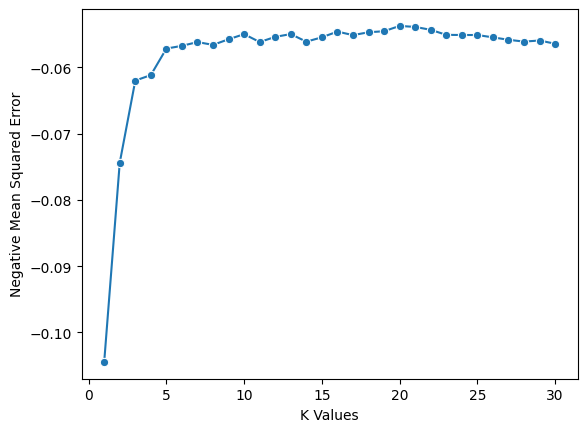

In [ ]:
# Plot the accuracy scores for each k value
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Negative Mean Squared Error")
plt.show()


Pemilihan K Terbaik: Nilai k dengan skor negatif rata-rata kesalahan kuadrat terendah dipilih sebagai k terbaik.

In [ ]:
# Find the best k value
best_index = np.argmin(scores)
best_k = k_values[best_index]
print(f"The best k value is {best_k} with a negative mean squared error of {scores[best_index]}")

The best k value is 1 with a negative mean squared error of -0.10446835443037976


Pelatihan Model: Model KNN dilatih menggunakan k terbaik pada set pelatihan.

In [ ]:
# Train a KNeighborsRegressor model with the best k value
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Evaluasi Model: Kinerja model dievaluasi pada set pengujian menggunakan mean_squared_error.

In [ ]:
# Evaluate the model on the test set
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test set negative mean squared error: {mse}")

Test set negative mean squared error: 0.04503164556962026
